In [1]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from keras.preprocessing.image import ImageDataGenerator

In [4]:
IMAGE_SIZE = 256
CHANNELS = 3
train_datagen = ImageDataGenerator(
    rescale=1./255, # scaling by deviding by 255
    horizontal_flip=True,
    rotation_range=10, # by 10 degree rotate the image
        
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    # save_to_dir="AugmentedImages"
    
)

Found 2896 images belonging to 58 classes.


In [5]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.9176471  0.9163888  0.9333334 ]
  [0.9176471  0.91663694 0.9333334 ]
  [0.9176471  0.91688496 0.9333334 ]
  ...
  [0.9450981  0.9450981  0.9607844 ]
  [0.9450981  0.9450981  0.9607844 ]
  [0.9424348  0.9450981  0.95812106]]

 [[0.9163967  0.914976   0.9333334 ]
  [0.91664475 0.9147279  0.9333334 ]
  [0.9168928  0.9144798  0.9333334 ]
  ...
  [0.9450981  0.9450981  0.9607844 ]
  [0.9450981  0.9450981  0.9607844 ]
  [0.9421867  0.9450981  0.957873  ]]

 [[0.91372555 0.9176471  0.9333334 ]
  [0.91372555 0.9176471  0.9333334 ]
  [0.91372555 0.9176471  0.9333334 ]
  ...
  [0.9450981  0.9450981  0.9607844 ]
  [0.9450981  0.9450981  0.9607844 ]
  [0.9419387  0.9450981  0.957625  ]]

 ...

 [[0.6112243  0.50675535 0.46285596]
  [0.5764706  0.49411768 0.44705886]
  [0.57497776 0.484414   0.4373552 ]
  ...
  [0.9215687  0.9215687  0.9215687 ]
  [0.9215687  0.9215687  0.9215687 ]
  [0.9215687  0.9215687  0.9215687 ]]

 [[0.6084955  0.50576305 0.46161562]
  [0.5764706  0.49411768 0.44705886]


In [6]:
validation_datagen = ImageDataGenerator(
    rescale=1./255, # scaling by deviding by 255
    horizontal_flip=True,
    rotation_range=10, # by 10 degree rotate the image
        
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse', # 0 1 2 ..
    
)

Found 394 images belonging to 58 classes.


In [7]:
test_datagen = ImageDataGenerator(
    rescale=1./255, # scaling by deviding by 255
    horizontal_flip=True,
    rotation_range=10, # by 10 degree rotate the image
        
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse', # 0 1 2 ..
    
)

Found 880 images belonging to 58 classes.


In [8]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 58

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),

])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [10]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
# number of training images devided by the number of images in one batch gives us how many batches we need.
2896/32

90.5

In [13]:
394/32

12.3125

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=90,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=12,
    verbose=1,
    epochs=20,
)

Epoch 1/20
90/90 [==============================] - 133s 1s/step - loss: 3.3742 - accuracy: 0.1603 - val_loss: 2.6609 - val_accuracy: 0.2839
Epoch 2/20
90/90 [==============================] - 106s 1s/step - loss: 2.1845 - accuracy: 0.4005 - val_loss: 1.7471 - val_accuracy: 0.4714
Epoch 3/20
90/90 [==============================] - 107s 1s/step - loss: 1.5046 - accuracy: 0.5468 - val_loss: 1.2040 - val_accuracy: 0.6432
Epoch 4/20
90/90 [==============================] - 107s 1s/step - loss: 1.2249 - accuracy: 0.6285 - val_loss: 1.0482 - val_accuracy: 0.6745
Epoch 5/20
90/90 [==============================] - 108s 1s/step - loss: 1.0880 - accuracy: 0.6610 - val_loss: 0.9266 - val_accuracy: 0.7109
Epoch 6/20
90/90 [==============================] - 107s 1s/step - loss: 0.8842 - accuracy: 0.7259 - val_loss: 0.7624 - val_accuracy: 0.7630
Epoch 7/20
90/90 [==============================] - 107s 1s/step - loss: 0.7811 - accuracy: 0.7608 - val_loss: 0.7353 - val_accuracy: 0.7708
Epoch 8/20
90

In [16]:
scores = model.evaluate(test_generator)

28/28 [==============================] - 18s 628ms/step - loss: 0.0763 - accuracy: 0.9727


In [17]:
scores

[0.07626985013484955, 0.9727272987365723]

In [18]:
history

In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 90}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

20

In [23]:
history.history['loss'][:5] # show loss for first 5 epochs

[3.374218463897705,
 2.184458017349243,
 1.5045924186706543,
 1.2248780727386475,
 1.0880457162857056]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.2838541567325592,
 0.4713541567325592,
 0.6432291865348816,
 0.6744791865348816,
 0.7109375,
 0.7630208134651184,
 0.7708333134651184,
 0.84375,
 0.8828125,
 0.90625,
 0.9322916865348816,
 0.90625,
 0.9322916865348816,
 0.9479166865348816,
 0.9140625,
 0.953125,
 0.9375,
 0.9375,
 0.953125,
 0.9739583134651184]

In [26]:
acc

[0.16026535630226135,
 0.40048882365226746,
 0.5467877388000488,
 0.6284916400909424,
 0.6609637141227722,
 0.7259078025817871,
 0.7608240246772766,
 0.806913435459137,
 0.8456704020500183,
 0.8872206807136536,
 0.9057262539863586,
 0.9102653861045837,
 0.9277234673500061,
 0.9479748606681824,
 0.9343575239181519,
 0.9633380174636841,
 0.9608938694000244,
 0.9710195660591125,
 0.971717894077301,
 0.978701114654541]

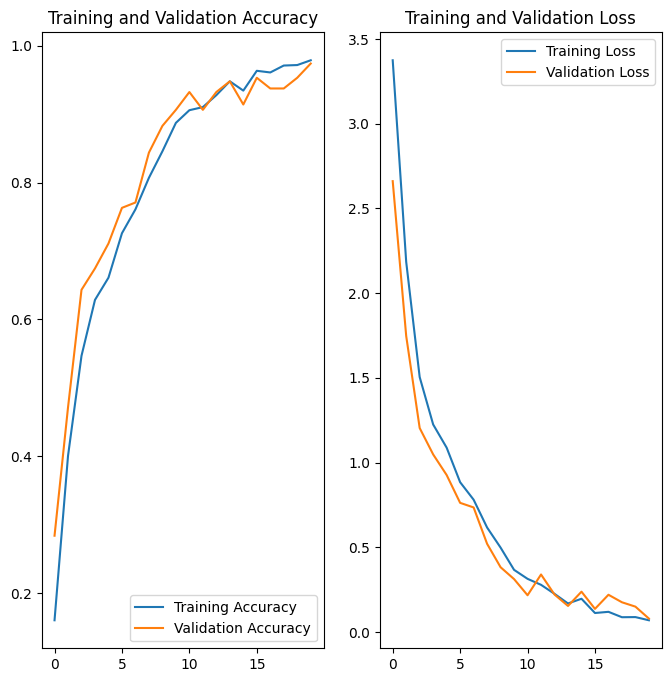

In [27]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
import pandas as pd
df = pd.read_csv('labels.csv')

In [34]:
class_numbers = list(train_generator.class_indices.keys())
class_numbers

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '6',
 '7',
 '8',
 '9']

In [37]:
class_names = []
for i in class_numbers:
 class_names.append(df['Name'][int(i)])

In [38]:
class_names

['Speed limit (5km/h)',
 'Speed limit (15km/h)',
 'Dont Go straight',
 'Dont Go Left',
 'Dont Go Left or Right',
 'Dont Go Right',
 'Dont overtake from Left',
 'No Uturn',
 'No Car',
 'No horn',
 'Speed limit (40km/h)',
 'Speed limit (50km/h)',
 'Speed limit (30km/h)',
 'Go straight or right',
 'Go straight',
 'Go Left',
 'Go Left or right',
 'Go Right',
 'keep Left',
 'keep Right',
 'Roundabout mandatory',
 'watch out for cars',
 'Horn',
 'Speed limit (40km/h)',
 'Bicycles crossing',
 'Uturn',
 'Road Divider',
 'Traffic signals',
 'Danger Ahead',
 'Zebra Crossing',
 'Bicycles crossing',
 'Children crossing',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Speed limit (50km/h)',
 'Unknown1',
 'Unknown2',
 'Unknown3',
 'Go right or straight',
 'Go left or straight',
 'Unknown4',
 'ZigZag Curve',
 'Train Crossing',
 'Under Construction',
 'Unknown5',
 'Speed limit (60km/h)',
 'Fences',
 'Heavy Vehicle Accidents',
 'Unknown6',
 'Give Way',
 'No stopping',
 'No entry',
 

first image to predict
actual label: Go straight
1/1 [==============================] - 0s 249ms/step
predicted label: Go straight


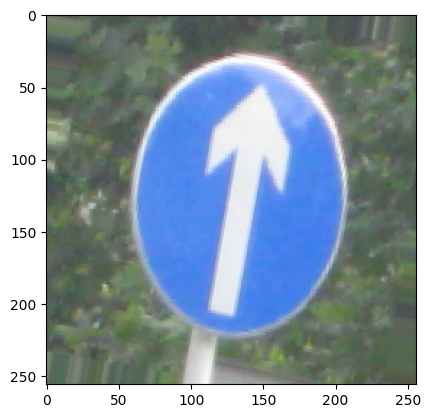

In [41]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 41ms/step


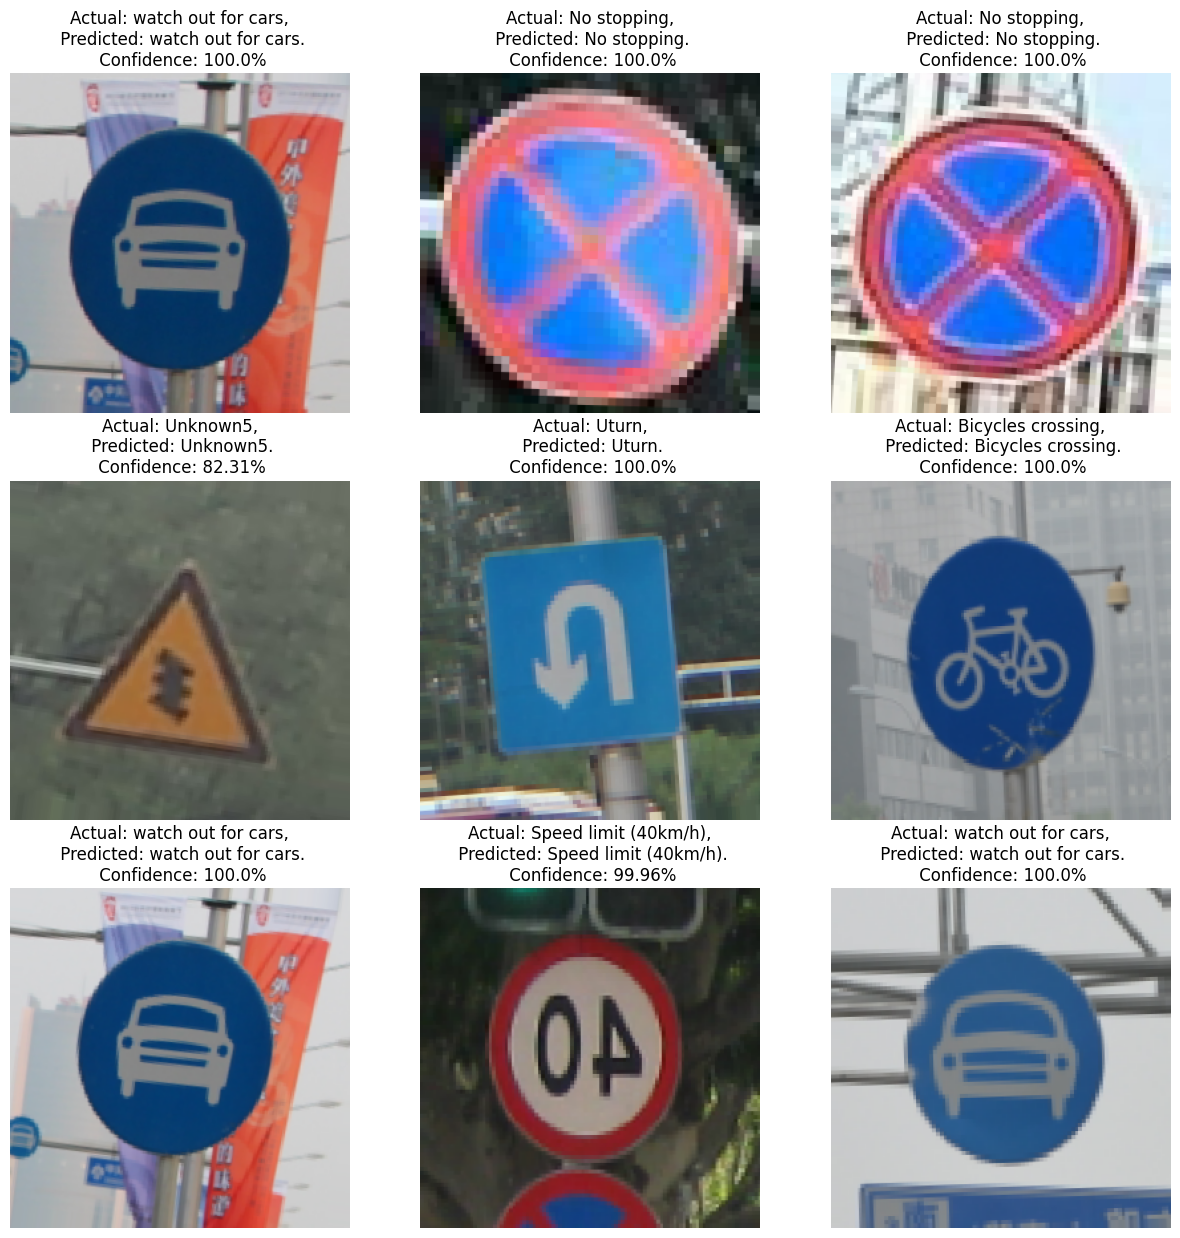

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [44]:
model.save("../traffic.h5")

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
